In [43]:
#Class imbalance>> one class has higher percentage
#upsampling, downsampling and smote
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [3]:
no_samples=1000
class_0_ratio=0.9
no_class_0=int(no_samples*class_0_ratio)
no_class_1=100

In [4]:
np.random.normal(0,1,no_class_0)

array([ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01, -1.07296862e+00,
        8.65407629e-01, -2.30153870e+00,  1.74481176e+00, -7.61206901e-01,
        3.19039096e-01, -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
       -3.22417204e-01, -3.84054355e-01,  1.13376944e+00, -1.09989127e+00,
       -1.72428208e-01, -8.77858418e-01,  4.22137467e-02,  5.82815214e-01,
       -1.10061918e+00,  1.14472371e+00,  9.01590721e-01,  5.02494339e-01,
        9.00855949e-01, -6.83727859e-01, -1.22890226e-01, -9.35769434e-01,
       -2.67888080e-01,  5.30355467e-01, -6.91660752e-01, -3.96753527e-01,
       -6.87172700e-01, -8.45205641e-01, -6.71246131e-01, -1.26645989e-02,
       -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,  7.42044161e-01,
       -1.91835552e-01, -8.87628964e-01, -7.47158294e-01,  1.69245460e+00,
        5.08077548e-02, -6.36995647e-01,  1.90915485e-01,  2.10025514e+00,
        1.20158952e-01,  6.17203110e-01,  3.00170320e-01, -3.52249846e-01,
       -1.14251820e+00, -

In [5]:
class_0={
    "feature1": np.random.normal(0,1,no_class_0),
    "feature2": np.random.normal(0,1,no_class_0),
    "target":[0]*no_class_0
}

In [6]:
class_0=pd.DataFrame(class_0)
class_0

,feature1,feature2,target
0,-0.446699,-1.307971,0
1,0.204377,1.472396,0
2,0.612233,0.074876,0
3,0.744885,-1.786935,0
4,-0.036281,0.165211,0
...,...,...,...
895,0.833679,-1.322762,0
896,2.160456,0.540306,0
897,1.998992,-0.507257,0
898,0.764041,1.128379,0


In [7]:
class_1=pd.DataFrame({
    "feature1": np.random.normal(3,1,no_class_1),
    "feature2": np.random.normal(3,1,no_class_1),
    "target":[1]*no_class_1
})
class_1

,feature1,feature2,target
0,2.546497,2.965789,1
1,2.179095,2.718501,1
2,3.940219,3.580178,1
3,1.588707,2.136473,1
4,3.884148,3.326813,1
...,...,...,...
95,1.402786,2.274796,1
96,3.461016,2.861925,1
97,4.316506,3.250043,1
98,3.296370,3.353116,1


In [8]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)
df

,feature1,feature2,target
0,-0.446699,-1.307971,0
1,0.204377,1.472396,0
2,0.612233,0.074876,0
3,0.744885,-1.786935,0
4,-0.036281,0.165211,0
...,...,...,...
995,1.402786,2.274796,1
996,3.461016,2.861925,1
997,4.316506,3.250043,1
998,3.296370,3.353116,1


In [9]:
df.shape

(1000, 3)

In [10]:
df.target.value_counts(normalize=True)

target
0    0.9
1    0.1
Name: proportion, dtype: float64

In [11]:
df_minority=df[df.target==1]
df_majority=df[df.target==0]

In [12]:
df_majority,df_minority

(     feature1  feature2  target
 0   -0.446699 -1.307971       0
 1    0.204377  1.472396       0
 2    0.612233  0.074876       0
 3    0.744885 -1.786935       0
 4   -0.036281  0.165211       0
 ..        ...       ...     ...
 895  0.833679 -1.322762       0
 896  2.160456  0.540306       0
 897  1.998992 -0.507257       0
 898  0.764041  1.128379       0
 899  1.687255 -1.223351       0
 
 [900 rows x 3 columns],
      feature1  feature2  target
 900  2.546497  2.965789       1
 901  2.179095  2.718501       1
 902  3.940219  3.580178       1
 903  1.588707  2.136473       1
 904  3.884148  3.326813       1
 ..        ...       ...     ...
 995  1.402786  2.274796       1
 996  3.461016  2.861925       1
 997  4.316506  3.250043       1
 998  3.296370  3.353116       1
 999  3.000008  2.499023       1
 
 [100 rows x 3 columns])

In [13]:
#Upsampling>> increasing the minority data to majority data

In [14]:
from sklearn.utils import resample

In [15]:
df_minority_upsampled=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=1)

In [16]:
df_minority_upsampled

,feature1,feature2,target
937,2.885843,2.430835,1
912,2.736919,2.996908,1
972,3.562542,3.088282,1
909,4.750722,2.409355,1
975,2.448677,4.986539,1
...,...,...,...
936,5.729462,2.524350,1
998,3.296370,3.353116,1
901,2.179095,2.718501,1
932,1.375641,1.785627,1


In [17]:
df_minority_upsampled.shape

(900, 3)

In [18]:
df_minority_upsampled.duplicated().sum()

800

In [19]:
df_upsampled=pd.concat([df_minority_upsampled,df_majority])

In [20]:
df_upsampled

,feature1,feature2,target
937,2.885843,2.430835,1
912,2.736919,2.996908,1
972,3.562542,3.088282,1
909,4.750722,2.409355,1
975,2.448677,4.986539,1
...,...,...,...
895,0.833679,-1.322762,0
896,2.160456,0.540306,0
897,1.998992,-0.507257,0
898,0.764041,1.128379,0


In [21]:
df_upsampled.shape

(1800, 3)

In [22]:
df_upsampled.target.value_counts(normalize=True)

target
1    0.5
0    0.5
Name: proportion, dtype: float64

In [23]:
#Downsampling>>

In [24]:
df_minority,df_majority

(     feature1  feature2  target
 900  2.546497  2.965789       1
 901  2.179095  2.718501       1
 902  3.940219  3.580178       1
 903  1.588707  2.136473       1
 904  3.884148  3.326813       1
 ..        ...       ...     ...
 995  1.402786  2.274796       1
 996  3.461016  2.861925       1
 997  4.316506  3.250043       1
 998  3.296370  3.353116       1
 999  3.000008  2.499023       1
 
 [100 rows x 3 columns],
      feature1  feature2  target
 0   -0.446699 -1.307971       0
 1    0.204377  1.472396       0
 2    0.612233  0.074876       0
 3    0.744885 -1.786935       0
 4   -0.036281  0.165211       0
 ..        ...       ...     ...
 895  0.833679 -1.322762       0
 896  2.160456  0.540306       0
 897  1.998992 -0.507257       0
 898  0.764041  1.128379       0
 899  1.687255 -1.223351       0
 
 [900 rows x 3 columns])

In [25]:
df_majority_downsampled=resample(df_majority,replace=True,n_samples=len(df_minority),random_state=1)

In [26]:
df_majority_downsampled

,feature1,feature2,target
37,0.949809,-0.746224,0
235,-0.438055,-0.237953,0
72,-0.839989,-0.458302,0
767,1.630906,1.025750,0
715,-1.899463,-0.440362,0
...,...,...,...
87,0.932721,0.030012,0
793,-0.825654,-1.581368,0
243,-0.267004,0.935192,0
348,-0.227253,0.955877,0


In [27]:
df_majority_downsampled.shape

(100, 3)

In [28]:
df_downsampled=pd.concat([df_majority_downsampled,df_minority])

In [29]:
df_downsampled.shape

(200, 3)

In [30]:
df_downsampled.target.value_counts(normalize=True)

target
0    0.5
1    0.5
Name: proportion, dtype: float64

In [31]:
#SMOTE>> Synthetic minority oversampling technique

In [32]:
from sklearn.datasets import make_classification

In [33]:
x,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.9],random_state=1)

In [34]:
x,y

(array([[ 1.53682958, -1.39869399],
        [ 1.55110839,  1.81032905],
        [ 1.29361936,  1.01094607],
        ...,
        [-0.55662536, -0.15983725],
        [ 1.00499902,  0.93628981],
        [ 1.46210987,  1.14497791]]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [35]:
len(y[y==0])

894

In [36]:
len(y[y==1])

106

In [37]:
x.shape

(1000, 2)

In [38]:
y.shape

(1000,)

In [39]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df1

,f1,f2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
995,2.210439,2.006772
996,1.910941,2.011860
997,-0.556625,-0.159837
998,1.004999,0.936290


In [40]:
df2=pd.DataFrame(y,columns=['target'])
df2

,target
0,1
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [41]:
df_final=pd.concat([df1,df2],axis=1)
df_final

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [44]:
df_final.target.value_counts()

target
0    894
1    106
Name: count, dtype: int64

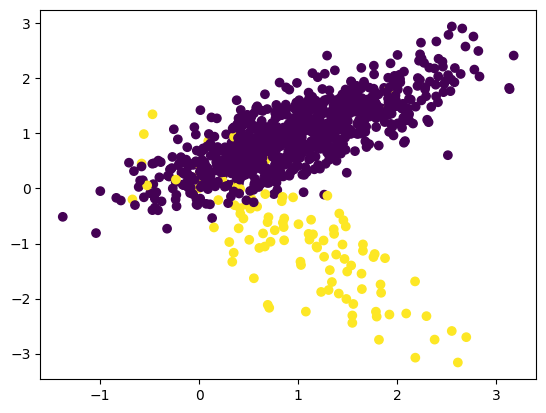

In [45]:
plt.scatter(df_final['f1'],df_final['f2'],c=df_final['target'])

<Axes: xlabel='f1', ylabel='f2'>

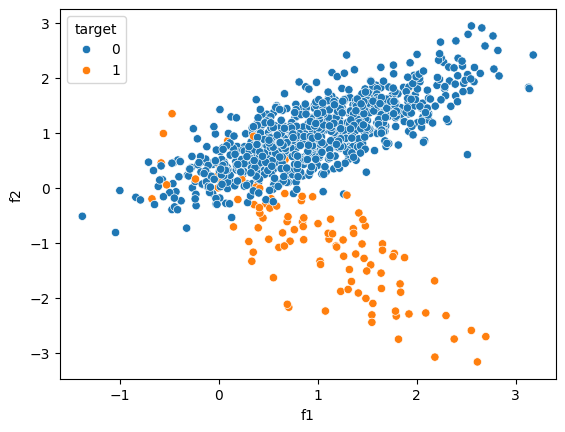

In [81]:
sns.scatterplot(x=df_final['f1'],y=df_final['f2'],hue=df.target)

In [49]:
pip install imblearn

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
oversample=SMOTE()

In [60]:
x,y=oversample.fit_resample(df_final[['f1','f2']],df_final['target'])

In [61]:
x,y

(            f1        f2
 0     1.536830 -1.398694
 1     1.551108  1.810329
 2     1.293619  1.010946
 3     1.119889  1.632518
 4     1.042356  1.121529
 ...        ...       ...
 1783  0.412443 -0.461477
 1784  1.480492 -0.682876
 1785  1.101318 -0.587191
 1786  1.202037 -1.055703
 1787 -0.603264  0.287864
 
 [1788 rows x 2 columns],
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 1783    1
 1784    1
 1785    1
 1786    1
 1787    1
 Name: target, Length: 1788, dtype: int64)

In [62]:
x.shape,y.shape

((1788, 2), (1788,))

In [64]:
len(y[y==0])

894

In [65]:
len(y[y==1])

894

In [71]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df1

,f1,f2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
1783,0.412443,-0.461477
1784,1.480492,-0.682876
1785,1.101318,-0.587191
1786,1.202037,-1.055703


In [74]:
df2=pd.DataFrame(y,columns=['target'])
df2

,target
0,1
1,0
2,0
3,0
4,0
...,...
1783,1
1784,1
1785,1
1786,1


In [77]:
df1.shape,df2.shape

((1788, 2), (1788, 1))

In [75]:
df=pd.concat([df1,df2],axis=1)

In [76]:
df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,0.412443,-0.461477,1
1784,1.480492,-0.682876,1
1785,1.101318,-0.587191,1
1786,1.202037,-1.055703,1


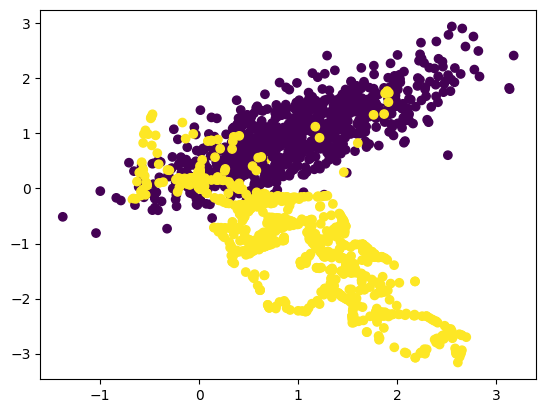

In [78]:
plt.scatter(df['f1'],df['f2'],c=df.target)

<Axes: xlabel='f1', ylabel='f2'>

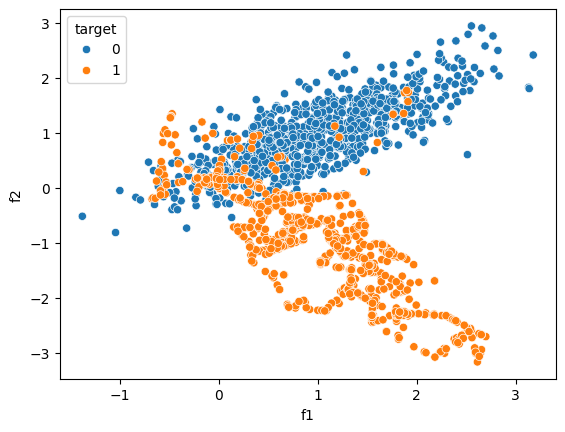

In [79]:
import seaborn as sns
sns.scatterplot(x=df['f1'],y=df['f2'],hue=df.target)